In [7]:
# ================== Image Compression ============== #
from sklearn.cluster import KMeans
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=Image.open('dw.jpg')
img_np=np.asarray(img)
img_np.shape

(1350, 2560, 3)

In [8]:
pixels=img_np.reshape(img_np.shape[0]* img_np.shape[1],img_np.shape[2])# To convert to pixels if not in pixels like this is already in pixels
pixels.shape

(3456000, 3)

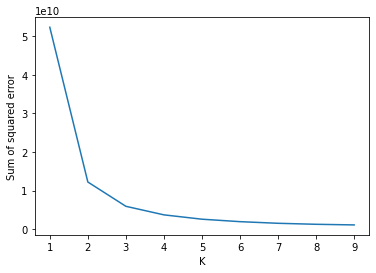

In [9]:
# Elbow Method
sse = []
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(pixels)
    sse.append(km.inertia_)
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

In [13]:
model=KMeans(n_clusters=16) # put k=2 for good compression
model.fit(pixels)

KMeans(n_clusters=16)

In [14]:
pixels_centroids=model.labels_
cluster_centers=model.cluster_centers_

final=np.zeros((pixels_centroids.shape[0],3))
for cluster_no in range(16):
    final[pixels_centroids==cluster_no]=cluster_centers[cluster_no]
final[0:5]
comp_image=final.reshape(img_np.shape[0],img_np.shape[1],3)
comp_image.shape

(1350, 2560, 3)

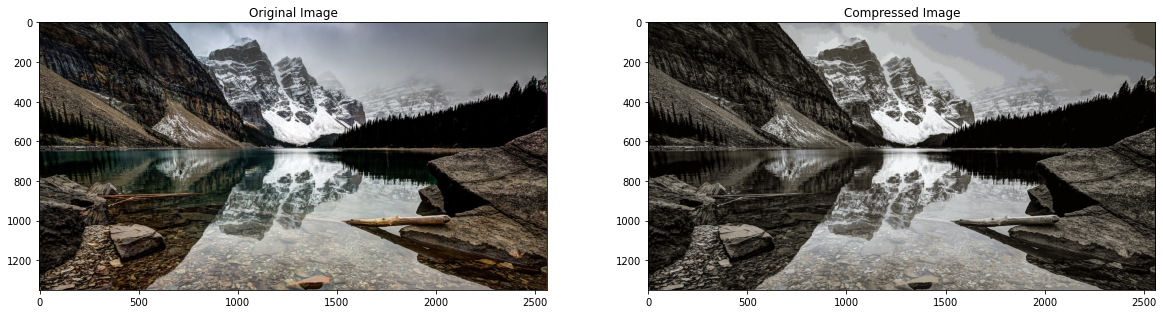

In [15]:
comp_image=Image.fromarray(np.uint8(comp_image))
comp_image.save('dw2.jpg')
fname='dw.jpg'
fname1='dw2.jpg'
img1=mpimg.imread(fname,0)
img2=mpimg.imread(fname1,0)
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,20))
ax1.imshow(img1)
ax1.set_title('Original Image')
ax2.imshow(img2)
ax2.set_title('Compressed Image')
plt.show()